## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [ ]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [ ]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
'''# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [1]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
from tensorflow.keras.layers import Input,Dense,LSTM
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [4]:
%load_ext tensorboard

In [3]:
#read the csv file
df = pd.read_csv('/content/drive/MyDrive/Copy of preprocessed_data.csv')
df.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
x=df.drop('project_is_approved',axis=1)
y=df['project_is_approved']

In [5]:
# perform stratified train test split on the dataset
x_train_1, x_test, y_train_1, y_test=train_test_split(x,y,test_size=0.2, stratify=y)
x_train, x_cv, y_train, y_cv=train_test_split(x_train_1,y_train_1,test_size=0.2, stratify=y_train_1)

In [6]:
num_classes=2
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 
y_cv = tf.keras.utils.to_categorical(y_cv, num_classes) 

In [7]:
class_imbalance=df.groupby('project_is_approved').count()['school_state']
class_imbalance
#The data is heavily imbalanced

project_is_approved
0    16542
1    92706
Name: school_state, dtype: int64

In [8]:
from sklearn.utils import compute_class_weight
class_weight = compute_class_weight("balanced", classes= np.unique(y),y=y)

In [9]:
class_weight

array([3.30214001, 0.58921753])

## 1.1 Text Vectorization

In [10]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs
tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='UNK')
tokenizer.fit_on_texts(x_train['essay'])

In [11]:
essay_train=tokenizer.texts_to_sequences(x_train['essay'])
essay_test=tokenizer.texts_to_sequences(x_test['essay'])
essay_cv=tokenizer.texts_to_sequences(x_cv['essay'])

In [12]:
max_words=max([len(i) for i in essay_train])

In [13]:
padded_essay_train=tf.keras.preprocessing.sequence.pad_sequences(essay_train,maxlen=max_words,dtype='int32',padding='post',truncating='post')
padded_essay_test=tf.keras.preprocessing.sequence.pad_sequences(essay_test,maxlen=max_words,dtype='int32',padding='post',truncating='post')
padded_essay_cv=tf.keras.preprocessing.sequence.pad_sequences(essay_cv,maxlen=max_words,dtype='int32',padding='post',truncating='post')

In [14]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
glove='/content/drive/MyDrive/Copy of glove.6B.100d.txt'
from tqdm import tqdm
embeddings_index = dict()
f = open(glove)
for line in tqdm(f):
 values = line.split()
 word = values[0]
 coefs = np.array(values[1:], dtype='float32')
 embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

400000it [00:20, 19390.97it/s]

Loaded 400000 word vectors.


In [15]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

47276

In [16]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tqdm(tokenizer.word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 47275/47275 [00:00<00:00, 440550.74it/s]


## 1.2 Categorical feature Vectorization

In [ ]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


In [17]:
x.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [18]:
state_tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='UNK')
state_tokenizer.fit_on_texts(x_train['school_state'])

state_train=state_tokenizer.texts_to_sequences(x_train['school_state'])
state_test=state_tokenizer.texts_to_sequences(x_test['school_state'])
state_cv=state_tokenizer.texts_to_sequences(x_cv['school_state'])

state_max_length=max([len(i) for i in state_train])

padded_state_train=tf.keras.preprocessing.sequence.pad_sequences(state_train,maxlen=state_max_length,dtype='int32',padding='post',truncating='post')
padded_state_test=tf.keras.preprocessing.sequence.pad_sequences(state_test,maxlen=state_max_length,dtype='int32',padding='post',truncating='post')
padded_state_cv=tf.keras.preprocessing.sequence.pad_sequences(state_cv,maxlen=state_max_length,dtype='int32',padding='post',truncating='post')

In [19]:
prefix_tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='UNK')
prefix_tokenizer.fit_on_texts(x_train['teacher_prefix'])

prefix_train=prefix_tokenizer.texts_to_sequences(x_train['teacher_prefix'])
prefix_test=prefix_tokenizer.texts_to_sequences(x_test['teacher_prefix'])
prefix_cv=prefix_tokenizer.texts_to_sequences(x_cv['teacher_prefix'])

prefix_max_length=max(list(len(i) for i in prefix_train))
print(prefix_max_length)

padded_prefix_train=tf.keras.preprocessing.sequence.pad_sequences(prefix_train,maxlen=prefix_max_length,dtype='int32',padding='post',truncating='post')
padded_prefix_test=tf.keras.preprocessing.sequence.pad_sequences(prefix_test,maxlen=prefix_max_length,dtype='int32',padding='post',truncating='post')
padded_prefix_cv=tf.keras.preprocessing.sequence.pad_sequences(prefix_cv,maxlen=prefix_max_length,dtype='int32',padding='post',truncating='post')

1


In [20]:
grade_tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='UNK')
grade_tokenizer.fit_on_texts(x_train['project_grade_category'])

grade_train=grade_tokenizer.texts_to_sequences(x_train['project_grade_category'])
grade_test=grade_tokenizer.texts_to_sequences(x_test['project_grade_category'])
grade_cv=grade_tokenizer.texts_to_sequences(x_cv['project_grade_category'])

grade_max_length=max(list(len(i) for i in grade_train))
print(grade_max_length)

padded_grade_train=tf.keras.preprocessing.sequence.pad_sequences(grade_train,maxlen=grade_max_length,dtype='int32',padding='post',truncating='post')
padded_grade_test=tf.keras.preprocessing.sequence.pad_sequences(grade_test,maxlen=grade_max_length,dtype='int32',padding='post',truncating='post')
padded_grade_cv=tf.keras.preprocessing.sequence.pad_sequences(grade_cv,maxlen=grade_max_length,dtype='int32',padding='post',truncating='post')

1


In [21]:
cat_tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='UNK')
cat_tokenizer.fit_on_texts(x_train['clean_categories'])

cat_train=cat_tokenizer.texts_to_sequences(x_train['clean_categories'])
cat_test=cat_tokenizer.texts_to_sequences(x_test['clean_categories'])
cat_cv=cat_tokenizer.texts_to_sequences(x_cv['clean_categories'])

cat_max_length=max(list(len(i) for i in cat_train))
print(cat_max_length)

padded_cat_train=tf.keras.preprocessing.sequence.pad_sequences(cat_train,maxlen=cat_max_length,dtype='int32',padding='post',truncating='post')
padded_cat_test=tf.keras.preprocessing.sequence.pad_sequences(cat_test,maxlen=cat_max_length,dtype='int32',padding='post',truncating='post')
padded_cat_cv=tf.keras.preprocessing.sequence.pad_sequences(cat_cv,maxlen=cat_max_length,dtype='int32',padding='post',truncating='post')

3


In [22]:
subcat_tokenizer=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token='UNK')
subcat_tokenizer.fit_on_texts(x_train['clean_subcategories'])

subcat_train=subcat_tokenizer.texts_to_sequences(x_train['clean_subcategories'])
subcat_test=subcat_tokenizer.texts_to_sequences(x_test['clean_subcategories'])
subcat_cv=subcat_tokenizer.texts_to_sequences(x_cv['clean_subcategories'])

subcat_max_length=max(list(len(i) for i in subcat_train))
print(subcat_max_length)

padded_subcat_train=tf.keras.preprocessing.sequence.pad_sequences(subcat_train,maxlen=subcat_max_length,dtype='int32',padding='post',truncating='post')
padded_subcat_test=tf.keras.preprocessing.sequence.pad_sequences(subcat_test,maxlen=subcat_max_length,dtype='int32',padding='post',truncating='post')
padded_subcat_cv=tf.keras.preprocessing.sequence.pad_sequences(subcat_cv,maxlen=subcat_max_length,dtype='int32',padding='post',truncating='post')

3


## 1.3 Numerical feature Vectorization

In [ ]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
no_of_proj_stand=StandardScaler()
no_of_proj_stand.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

standardized_no_proj_train=no_of_proj_stand.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_no_proj_test=no_of_proj_stand.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_no_proj_cv=no_of_proj_stand.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


In [25]:
x_train['price']
price_stand=StandardScaler()
price_stand.fit(x_train['price'].values.reshape(-1,1))

price_train=price_stand.transform(x_train['price'].values.reshape(-1,1))
price_test=price_stand.transform(x_test['price'].values.reshape(-1,1))
price_cv=price_stand.transform(x_cv['price'].values.reshape(-1,1))

In [29]:
numerical_train=np.hstack((standardized_no_proj_train,price_train))
numerical_test=np.hstack((standardized_no_proj_test,price_test))
numerical_cv=np.hstack((standardized_no_proj_cv,price_cv))

## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [ ]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [26]:
activation_function='relu'
dropout=0.4

In [32]:
#Writing code for all the inputs

text_input=tf.keras.Input(shape=(padded_essay_train.shape[1]), name= 'essay')
state_input=tf.keras.Input(shape=(padded_state_train.shape[1]),name='state')
prefix_input=tf.keras.Input(shape=(padded_prefix_train.shape[1]), name='prefix')
cat_input=tf.keras.Input(shape=(padded_cat_train.shape[1]),name='cat')
subcat_input=tf.keras.Input(shape=(padded_subcat_train.shape[1]),name='subcat')
grade_input=tf.keras.Input(shape=(padded_grade_train.shape[1]),name='grade')
numeric_input=tf.keras.Input(shape=(numerical_train.shape[1]),name='numeric')

#Text Processing Networks
embedded_output_essay=tf.keras.layers.Embedding(input_dim=vocab_size ,output_dim=100,input_length=padded_essay_train.shape[1], input_shape=text_input.shape, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),trainable=False )(text_input)

lstm_output_essay=tf.keras.layers.LSTM(16,return_sequences=True)(embedded_output_essay)
lstm_output_essay=tf.keras.layers.BatchNormalization()(lstm_output_essay)
text_input_1=tf.keras.layers.Flatten()(lstm_output_essay)
#,kernel_initializer=tf.keras.initializers.HeNormal(20) 
#,kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001)

#State Input
input_dim_state=max(state_tokenizer.word_index.values())+1

embedded_output_state=tf.keras.layers.Embedding(input_dim=input_dim_state,output_dim=10,input_length=padded_state_train.shape[1])(state_input)
state_input_1=tf.keras.layers.Flatten()(embedded_output_state)

#Grade Input
input_dim_grade=max(grade_tokenizer.word_index.values())+1

embedded_output_grade=tf.keras.layers.Embedding(input_dim=input_dim_grade,output_dim=10,input_length=padded_grade_train.shape[1])(grade_input)
grade_input_1=tf.keras.layers.Flatten()(embedded_output_grade)

#category Input
input_dim_cat=max(cat_tokenizer.word_index.values())+1

embedded_output_cat=tf.keras.layers.Embedding(input_dim=input_dim_cat,output_dim=10,input_length=padded_cat_train.shape[1])(cat_input)
cat_input_1=tf.keras.layers.Flatten()(embedded_output_cat)

#subcategory Input
input_dim_subcat=max(subcat_tokenizer.word_index.values())+1

embedded_output_subcat=tf.keras.layers.Embedding(input_dim=input_dim_subcat,output_dim=10,input_length=padded_subcat_train.shape[1])(subcat_input)
subcat_input_1=tf.keras.layers.Flatten()(embedded_output_subcat)

#subcategory Input
input_dim_prefix=max(prefix_tokenizer.word_index.values())+1

embedded_output_prefix=tf.keras.layers.Embedding(input_dim=input_dim_prefix,output_dim=10,input_length=padded_prefix_train.shape[1])(prefix_input)
prefix_input_1=tf.keras.layers.Flatten()(embedded_output_prefix)

#numerical input
numeric_input_1=tf.keras.layers.Dense(32,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(30))(numeric_input)

#Concatenating the inputs
concatenated_input=tf.keras.layers.concatenate([text_input_1,prefix_input_1,state_input_1,cat_input_1,subcat_input_1,grade_input_1,numeric_input_1],axis=1)

#Layers after the concatenating layers
#,kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001)
concatenated_input=tf.keras.layers.Dense(64,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(50))(concatenated_input)
concatenated_input_1=tf.keras.layers.Dropout(dropout)(concatenated_input)
concatenated_input_2=tf.keras.layers.Dense(32,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(60))(concatenated_input_1)
concatenated_input_3=tf.keras.layers.Dropout(dropout)(concatenated_input_2)
concatenated_input_4=tf.keras.layers.Dense(16,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(20))(concatenated_input_3)
output_layer=tf.keras.layers.Dense(2,activation='softmax')(concatenated_input_4)

model=tf.keras.Model(inputs={'essay':text_input,'prefix':prefix_input, 'state':state_input, 'cat':cat_input, 'subcat':subcat_input, 'grade':grade_input, 'numeric':numeric_input},outputs=output_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay (InputLayer)             [(None, 339)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 339, 100)     4727600     ['essay[0][0]']                  
                                                                                                  
 lstm_1 (LSTM)                  (None, 339, 16)      7488        ['embedding_6[0][0]']            
                                                                                                  
 prefix (InputLayer)            [(None, 1)]          0           []                               
                                                                                            

## 1.5 Compiling and fittng your model

In [ ]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [ ]:
#https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network
print(np.any(np.isnan(padded_prefix_train)))
print(np.any(np.isnan(padded_state_train)))
print(np.any(np.isnan(padded_grade_train)))
print(np.any(np.isnan(padded_cat_train)))
print(np.any(np.isnan(padded_subcat_train)))
print(np.any(np.isnan(padded_essay_train)))
print(np.any(np.isnan(numerical_train)))
print(np.any(np.isnan(embedding_matrix)))

False
False
False
False
False
False
False
False


In [ ]:
#https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network
print(np.any(np.isinf(padded_prefix_train)))
print(np.any(np.isinf(padded_state_train)))
print(np.any(np.isinf(padded_grade_train)))
print(np.any(np.isinf(padded_cat_train)))
print(np.any(np.isinf(padded_subcat_train)))
print(np.any(np.isinf(padded_essay_train)))
print(np.any(np.isinf(numerical_train)))
print(np.any(np.isinf(embedding_matrix)))

False
False
False
False
False
False
False
False


In [ ]:
print(np.all(np.isfinite(padded_prefix_train)))
print(np.all(np.isfinite(padded_state_train)))
print(np.all(np.isfinite(padded_grade_train)))
print(np.all(np.isfinite(padded_cat_train)))
print(np.all(np.isfinite(padded_subcat_train)))
print(np.all(np.isfinite(padded_essay_train)))
print(np.all(np.isfinite(numerical_train)))
print(np.all(np.isfinite(embedding_matrix)))

True
True
True
True
True
True
True
True


In [ ]:
print(type(padded_prefix_train))
print(type(padded_state_train))
print(type(padded_grade_train))
print(type(padded_cat_train))
print(type(padded_subcat_train))
print(type(padded_essay_train))
print(type(numerical_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
from sklearn.metrics import roc_auc_score

def auc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)


paths='/content/drive/MyDrive/Assignment 24/f_model.hdf5'

checkpoint_save = tf.keras.callbacks.ModelCheckpoint(paths, monitor='val_auc', verbose=1, save_best_only=True, mode='max')


model.compile(optimizer=tf.keras.optimizers.Adam(0.003, beta_1 = 1e-4), loss='categorical_crossentropy', metrics=[auc,'accuracy'])

logs='/content/drive/MyDrive/Assignment 24/logs/model_1'

tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logs)


model.fit({'essay':padded_essay_train,'prefix':padded_prefix_train, 'state':padded_state_train, 'cat':padded_cat_train, 'subcat':padded_subcat_train, 'grade':padded_grade_train, 'numeric':numerical_train}, y_train,
          epochs=6, validation_data=({'essay':padded_essay_cv,'prefix':padded_prefix_cv, 'state':padded_state_cv, 'cat':padded_cat_cv, 'subcat':padded_subcat_cv, 'grade':padded_grade_cv, 'numeric':numerical_cv}, y_cv)
          , verbose=1,callbacks=[tensorboard,checkpoint_save], batch_size=64,class_weight={0:class_weight[0],1:class_weight[1]})

Epoch 1/6
1092/1093 [============================>.] - ETA: 0s - loss: 0.7013 - auc: 0.6135 - accuracy: 0.5223
Epoch 1: val_auc improved from -inf to 0.71418, saving model to /content/drive/MyDrive/Assignment 24/f_model.hdf5
1093/1093 [==============================] - 41s 35ms/step - loss: 0.7013 - auc: 0.6136 - accuracy: 0.5224 - val_loss: 0.6979 - val_auc: 0.7142 - val_accuracy: 0.6446
Epoch 2/6
1092/1093 [============================>.] - ETA: 0s - loss: 0.6289 - auc: 0.7168 - accuracy: 0.7253
Epoch 2: val_auc improved from 0.71418 to 0.72262, saving model to /content/drive/MyDrive/Assignment 24/f_model.hdf5
1093/1093 [==============================] - 36s 33ms/step - loss: 0.6288 - auc: 0.7170 - accuracy: 0.7253 - val_loss: 0.6251 - val_auc: 0.7226 - val_accuracy: 0.6931
Epoch 3/6
1093/1093 [==============================] - ETA: 0s - loss: 0.6130 - auc: 0.7404 - accuracy: 0.7387
Epoch 3: val_auc improved from 0.72262 to 0.73381, saving model to /content/drive/MyDrive/Assignment 2

In [37]:
model.load_weights('/content/drive/MyDrive/Assignment 24/f_model.hdf5')

In [38]:
y_test_pred=model.predict({'essay':padded_essay_test,'prefix':padded_prefix_test, 'state':padded_state_test, 'cat':padded_cat_test, 'subcat':padded_subcat_test, 'grade':padded_grade_test, 'numeric':numerical_test}, batch_size=1)

21850/21850 [==============================] - 197s 9ms/step


In [39]:
auc(y_test[:,1],y_test_pred[:,1])

<tf.Tensor: shape=(), dtype=float64, numpy=0.743522948391162>

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer=TfidfVectorizer()

tf_vectorizer.fit(x_train['essay'])

TfidfVectorizer()

In [ ]:
idf_scores=tf_vectorizer.idf_
vocabulary=tf_vectorizer.vocabulary_.items()

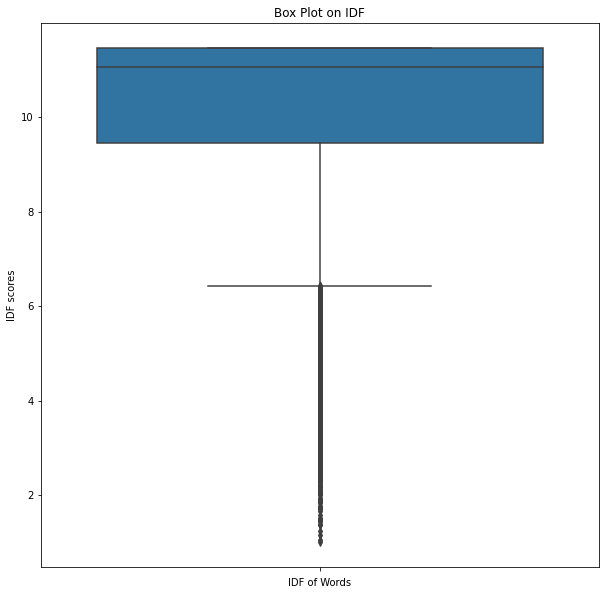

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.title('Box Plot on IDF')
plt.xlabel('IDF of Words')
plt.ylabel('IDF scores')

sns.boxplot(y=tf_vectorizer.idf_)
plt.show()

In [ ]:
print('The 100th Percentile is ',np.percentile((tf_vectorizer.idf_),100))
print('The 1th Percentile is ',np.percentile((tf_vectorizer.idf_),1))

The 100th Percentile is  11.4619455276077
The 1th Percentile is  4.052097932091764


In [ ]:
for values in range(0,101,10):
  print('The {} percentile is {}'.format(values,np.percentile((tf_vectorizer.idf_),values)))

The 0 percentile is 1.0081857021393015
The 10 percentile is 7.454612342375229
The 20 percentile is 8.896996170146164
The 30 percentile is 9.8525076151736
The 40 percentile is 10.545654795733544
The 50 percentile is 11.056480419499536
The 60 percentile is 11.056480419499536
The 70 percentile is 11.4619455276077
The 80 percentile is 11.4619455276077
The 90 percentile is 11.4619455276077
The 100 percentile is 11.4619455276077


In [ ]:
for values in np.arange(0,1,0.1):
  print('The {} percentile is {}'.format(values,np.percentile((tf_vectorizer.idf_),values)))

The 0.0 percentile is 1.0081857021393015
The 0.1 percentile is 2.3385042392073965
The 0.2 percentile is 2.6897320086784178
The 0.30000000000000004 percentile is 3.0122203495596924
The 0.4 percentile is 3.2431664962310935
The 0.5 percentile is 3.437652634216872
The 0.6000000000000001 percentile is 3.5726829770066746
The 0.7000000000000001 percentile is 3.704750047694964
The 0.8 percentile is 3.83309200547498
The 0.9 percentile is 3.9619499127083895


In [ ]:
for values in np.arange(90,100,1):
  print('The {} percentile is {}'.format(values,np.percentile((tf_vectorizer.idf_),values)))

The 90 percentile is 11.4619455276077
The 91 percentile is 11.4619455276077
The 92 percentile is 11.4619455276077
The 93 percentile is 11.4619455276077
The 94 percentile is 11.4619455276077
The 95 percentile is 11.4619455276077
The 96 percentile is 11.4619455276077
The 97 percentile is 11.4619455276077
The 98 percentile is 11.4619455276077
The 99 percentile is 11.4619455276077


In [ ]:
#The model is not performing well with the threshold as 6.2 which is the IQR
#Setting the threshold as 4.05
#because the values above 50% have a idf value of 11, hence removing values above idf value of 11, and trying how the model performance is affected
#At t=11 that is removing values above 12, the score is 0.735
t=2

In [ ]:
from tqdm import tqdm

tf_dict=dict()
threshold=t
for words, index in tqdm(list(vocabulary)):
  if list(idf_scores)[index]>t:
      tf_dict[words]=list(idf_scores)[index]

100%|██████████| 47554/47554 [03:11<00:00, 248.59it/s]


In [ ]:
new_word_index=dict()
for i,word in tqdm(enumerate(list(tf_dict.keys()))):
  new_word_index[word]=i

47529it [00:00, 1721497.01it/s]


In [ ]:
tokenizer_model_2=tokenizer
tokenizer_model_2.word_index=new_word_index
tokenizer_model_2.word_index[tokenizer_model_2.oov_token] = max(new_word_index.values()) + 1

In [ ]:
vocab_size_model_2=len(tokenizer_model_2.word_index.values())+1
print(vocab_size_model_2)

47531


In [ ]:
#Creating embedding matrix
embedding_matrix_model_2 = np.zeros((vocab_size_model_2, 100))
for word, i in tqdm(tokenizer_model_2.word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_model_2[i] = embedding_vector

100%|██████████| 47530/47530 [00:00<00:00, 541539.38it/s]


In [ ]:
embedding_matrix_model_2.shape

(47531, 100)

In [ ]:
essay_train_model_2=tokenizer_model_2.texts_to_sequences(x_train['essay'])
essay_test_model_2=tokenizer_model_2.texts_to_sequences(x_test['essay'])
essay_cv_model_2=tokenizer_model_2.texts_to_sequences(x_cv['essay'])


In [ ]:
max_length_model_2=max([len(i) for i in essay_train_model_2])
print(max_length_model_2)

333


In [ ]:
padded_essay_train_model_2=tf.keras.utils.pad_sequences(essay_train_model_2,maxlen=max_length_model_2,padding='post',truncating='post')
padded_essay_test_model_2=tf.keras.utils.pad_sequences(essay_test_model_2,maxlen=max_length_model_2,padding='post',truncating='post')
padded_essay_cv_model_2=tf.keras.utils.pad_sequences(essay_cv_model_2,maxlen=max_length_model_2,padding='post',truncating='post')


In [ ]:
len(tokenizer_model_2.word_index)

47530

In [ ]:
embedding_matrix_model_2.shape

(47531, 100)

In [ ]:
from sklearn.metrics import roc_auc_score


def auc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
activation_function='relu'
dropout=0.5

In [ ]:
#Writing code for all the inputs

text_input=tf.keras.Input(shape=(padded_essay_train_model_2.shape[1]), name= 'essay')
state_input=tf.keras.Input(shape=(padded_state_train.shape[1]),name='state')
prefix_input=tf.keras.Input(shape=(padded_prefix_train.shape[1]), name='prefix')
cat_input=tf.keras.Input(shape=(padded_cat_train.shape[1]),name='cat')
subcat_input=tf.keras.Input(shape=(padded_subcat_train.shape[1]),name='subcat')
grade_input=tf.keras.Input(shape=(padded_grade_train.shape[1]),name='grade')
numeric_input=tf.keras.Input(shape=(numerical_train.shape[1]),name='numeric')

#Text Processing Networks

embedded_output_essay=tf.keras.layers.Embedding(input_dim=vocab_size_model_2 ,output_dim=100,input_length=padded_essay_train_model_2.shape[1], input_shape=text_input.shape, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix_model_2),trainable=False )(text_input)

lstm_output_essay=tf.keras.layers.LSTM(32,return_sequences=True,kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(embedded_output_essay)
text_input_1=tf.keras.layers.Flatten()(lstm_output_essay)
#,kernel_regularizer='l1_l2'
#State Input
input_dim_state=max(state_tokenizer.word_index.values())+1

embedded_output_state=tf.keras.layers.Embedding(input_dim=input_dim_state,output_dim=10,input_length=padded_state_train.shape[1])(state_input)
state_input_1=tf.keras.layers.Flatten()(embedded_output_state)

#Grade Input
input_dim_grade=max(grade_tokenizer.word_index.values())+1

embedded_output_grade=tf.keras.layers.Embedding(input_dim=input_dim_grade,output_dim=10,input_length=padded_grade_train.shape[1])(grade_input)
grade_input_1=tf.keras.layers.Flatten()(embedded_output_grade)

#category Input
input_dim_cat=max(cat_tokenizer.word_index.values())+1

embedded_output_cat=tf.keras.layers.Embedding(input_dim=input_dim_cat,output_dim=10,input_length=padded_cat_train.shape[1])(cat_input)
cat_input_1=tf.keras.layers.Flatten()(embedded_output_cat)

#subcategory Input
input_dim_subcat=max(subcat_tokenizer.word_index.values())+1

embedded_output_subcat=tf.keras.layers.Embedding(input_dim=input_dim_subcat,output_dim=10,input_length=padded_subcat_train.shape[1])(subcat_input)
subcat_input_1=tf.keras.layers.Flatten()(embedded_output_subcat)

#subcategory Input
input_dim_prefix=max(prefix_tokenizer.word_index.values())+1

embedded_output_prefix=tf.keras.layers.Embedding(input_dim=input_dim_prefix,output_dim=10,input_length=padded_prefix_train.shape[1])(prefix_input)
prefix_input_1=tf.keras.layers.Flatten()(embedded_output_prefix)

#numerical input
numeric_input_1=tf.keras.layers.Dense(32,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(30))(numeric_input)

#Concatenating the inputs
concatenated_input=tf.keras.layers.concatenate([text_input_1,prefix_input_1,state_input_1,cat_input_1,subcat_input_1,grade_input_1,numeric_input_1],axis=1)

#Layers after the concatenating layers
concatenated_input=tf.keras.layers.Dense(64,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(50),kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(concatenated_input)
concatenated_input_1=tf.keras.layers.Dropout(dropout)(concatenated_input)
concatenated_input_2=tf.keras.layers.Dense(32,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(60),kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(concatenated_input_1)
concatenated_input_3=tf.keras.layers.Dropout(dropout)(concatenated_input_2)
concatenated_input_4=tf.keras.layers.Dense(16,activation=activation_function,kernel_initializer=tf.keras.initializers.HeNormal(20),kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(concatenated_input_3)
output_layer=tf.keras.layers.Dense(2,activation='softmax')(concatenated_input_4)

model_2=tf.keras.Model(inputs={'essay':text_input,'prefix':prefix_input, 'state':state_input, 'cat':cat_input, 'subcat':subcat_input, 'grade':grade_input, 'numeric':numeric_input},outputs=output_layer)
model_2.summary()



Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay (InputLayer)             [(None, 333)]        0           []                               
                                                                                                  
 embedding_55 (Embedding)       (None, 333, 100)     4753100     ['essay[0][0]']                  
                                                                                                  
 prefix (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 state (InputLayer)             [(None, 1)]          0           []                               
                                                                                           

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001, beta_1 = 1e-4), loss='categorical_crossentropy', metrics=[auc, 'accuracy'])

paths='/content/drive/MyDrive/Assignment 24/f_model_2.hdf5'

checkpoint_save = tf.keras.callbacks.ModelCheckpoint(paths, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

logs='/content/drive/MyDrive/Assignment 24/logs/model_2'

tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logs)

model_2.fit({'essay':padded_essay_train_model_2,'prefix':padded_prefix_train, 'state':padded_state_train, 'cat':padded_cat_train, 'subcat':padded_subcat_train, 'grade':padded_grade_train, 'numeric':numerical_train}, y_train,
          epochs=10, validation_data=({'essay':padded_essay_cv_model_2,'prefix':padded_prefix_cv, 'state':padded_state_cv, 'cat':padded_cat_cv, 'subcat':padded_subcat_cv, 'grade':padded_grade_cv, 'numeric':numerical_cv}, y_cv)
          , verbose=1,callbacks=[checkpoint_save,tensorboard], batch_size=64,class_weight={0:class_weight[0],1:class_weight[1]})

Epoch 1/10
1092/1093 [============================>.] - ETA: 0s - loss: 0.7027 - auc: 0.6404 - accuracy: 0.6114
Epoch 1: val_auc improved from -inf to 0.71530, saving model to /content/drive/MyDrive/Assignment 24/f_model_2.hdf5
1093/1093 [==============================] - 33s 28ms/step - loss: 0.7027 - auc: 0.6405 - accuracy: 0.6115 - val_loss: 0.6143 - val_auc: 0.7153 - val_accuracy: 0.7766
Epoch 2/10
1093/1093 [==============================] - ETA: 0s - loss: 0.6582 - auc: 0.7214 - accuracy: 0.7063
Epoch 2: val_auc improved from 0.71530 to 0.73022, saving model to /content/drive/MyDrive/Assignment 24/f_model_2.hdf5
1093/1093 [==============================] - 30s 28ms/step - loss: 0.6582 - auc: 0.7214 - accuracy: 0.7063 - val_loss: 0.6394 - val_auc: 0.7302 - val_accuracy: 0.7761
Epoch 3/10
1091/1093 [============================>.] - ETA: 0s - loss: 0.6446 - auc: 0.7384 - accuracy: 0.7229
Epoch 3: val_auc improved from 0.73022 to 0.73459, saving model to /content/drive/MyDrive/Assig

In [ ]:
model_2.load_weights('/content/drive/MyDrive/Assignment 24/f_model_2.hdf5')

In [ ]:
y_test_pred_model_2=model_2.predict({'essay':padded_essay_test_model_2,'prefix':padded_prefix_test, 'state':padded_state_test, 'cat':padded_cat_test, 'subcat':padded_subcat_test, 'grade':padded_grade_test, 'numeric':numerical_test}, batch_size=1)

21850/21850 [==============================] - 138s 6ms/step


In [ ]:
auc(y_test[:,1],y_test_pred_model_2[:,1])

<tf.Tensor: shape=(), dtype=float64, numpy=0.7419146271016863>

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>

*   List item

*   List item

*   List item

*   List item
*   List item


*   List item


*   List item


*   List item


ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.
x_train.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
37466,ca,mrs,grades_3_5,1,specialneeds,specialneeds,our students range kindergarten eighth grade t...,374.57


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

grade_vectorizer=CountVectorizer(binary=True)
grade_vectorizer.fit(x_train['project_grade_category'])
grade_train_model2=grade_vectorizer.transform(x_train['project_grade_category'])
grade_test_model2=grade_vectorizer.transform(x_test['project_grade_category'])
grade_cv_model2=grade_vectorizer.transform(x_cv['project_grade_category'])
print(grade_train_model2.shape)

(69918, 4)


In [ ]:
state_vectorizer=CountVectorizer(binary=True)
state_vectorizer.fit(x_train['school_state'])
state_train_model2=state_vectorizer.transform(x_train['school_state'])
state_test_model2=state_vectorizer.transform(x_test['school_state'])
state_cv_model2=state_vectorizer.transform(x_cv['school_state'])
print(state_train_model2.shape)

(69918, 51)


In [ ]:
prefix_vectorizer=CountVectorizer(binary=True)
prefix_vectorizer.fit(x_train['teacher_prefix'])
prefix_train_model2=prefix_vectorizer.transform(x_train['teacher_prefix'])
prefix_test_model2=prefix_vectorizer.transform(x_test['teacher_prefix'])
prefix_cv_model2=prefix_vectorizer.transform(x_cv['teacher_prefix'])
print(prefix_train_model2.shape)

(69918, 5)


In [ ]:
cat_vectorizer=CountVectorizer(binary=True)
cat_vectorizer.fit(x_train['clean_categories'])
cat_train_model2=cat_vectorizer.transform(x_train['clean_categories'])
cat_test_model2=cat_vectorizer.transform(x_test['clean_categories'])
cat_cv_model2=cat_vectorizer.transform(x_cv['clean_categories'])
print(cat_train_model2.shape)

(69918, 9)


In [ ]:
subcat_vectorizer=CountVectorizer(binary=True)
subcat_vectorizer.fit(x_train['project_grade_category'])
subcat_train_model2=subcat_vectorizer.transform(x_train['project_grade_category'])
subcat_test_model2=subcat_vectorizer.transform(x_test['project_grade_category'])
subcat_cv_model2=subcat_vectorizer.transform(x_cv['project_grade_category'])
print(subcat_train_model2.shape)

(69918, 4)


In [ ]:
from scipy.sparse import hstack
categorical_train_data=hstack([subcat_train_model2,cat_train_model2,grade_train_model2,prefix_train_model2,state_train_model2]).toarray()
categorical_test_data=hstack([subcat_test_model2,cat_test_model2,grade_test_model2,prefix_test_model2,state_test_model2]).toarray()
categorical_cv_data=hstack([subcat_cv_model2,cat_cv_model2,grade_cv_model2,prefix_cv_model2,state_cv_model2]).toarray()

In [ ]:
stacked_cat_train=categorical_train_data[:,:,np.newaxis]
stacked_cat_test=categorical_test_data[:,:,np.newaxis]
stacked_cat_cv=categorical_cv_data[:,:,np.newaxis]

In [ ]:
print(categorical_train_data[:,:,np.newaxis].shape)
print(categorical_train_data[:,np.newaxis].shape)
print(categorical_train_data[np.newaxis,:].shape)

#categorical_train_data[np.newaxis]

(69918, 73, 1)
(69918, 1, 73)
(1, 69918, 73)


In [ ]:
actvation_unit='relu'
dropout=0.6 #0.3,0.4

In [ ]:
#Defining the third model
input_layer_essay=tf.keras.layers.Input(shape=(padded_essay_train.shape[1]), name='essay_feature')
input_layer_other_features=tf.keras.layers.Input(shape=(categorical_train_data.shape[1],1), name='other')

embedded_output_essay=tf.keras.layers.Embedding(input_dim=vocab_size ,output_dim=100,input_length=padded_essay_train.shape[1], input_shape=input_layer_essay.shape, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),trainable=False )(input_layer_essay)

lstm_output=tf.keras.layers.LSTM(32,return_sequences=True)(embedded_output_essay)

#,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)

text_input=tf.keras.layers.Flatten()(lstm_output)

#Other features
conv_1=tf.keras.layers.Conv1D(64,3,strides=1,padding='same', activation=actvation_unit,kernel_initializer='he_normal')(input_layer_other_features)
conv_2=tf.keras.layers.Conv1D(64,3,strides=2,padding='same', activation=actvation_unit,kernel_initializer='he_normal')(conv_1)
other_output=tf.keras.layers.Flatten()(conv_2)

concatenated_input=tf.keras.layers.concatenate([text_input,other_output])

dense_1=tf.keras.layers.Dense(64,actvation_unit,kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(concatenated_input)
drop_1=tf.keras.layers.Dropout(0.6)(dense_1)

dense_2=tf.keras.layers.Dense(32,actvation_unit,kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(drop_1)
drop_2=tf.keras.layers.Dropout(0.5)(dense_2)

dense_3=tf.keras.layers.Dense(16,actvation_unit,kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(l2=0.0001))(drop_2)
drop_3=tf.keras.layers.Dropout(0.4)(dense_3)

output= tf.keras.layers.Dense(2, 'softmax')(drop_3)

model_3=tf.keras.Model(inputs={'essay_feature':input_layer_essay,'other':input_layer_other_features}, outputs=output)

model_3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_feature (InputLayer)     [(None, 333)]        0           []                               
                                                                                                  
 other (InputLayer)             [(None, 73, 1)]      0           []                               
                                                                                                  
 embedding_24 (Embedding)       (None, 333, 100)     4759200     ['essay_feature[0][0]']          
                                                                                                  
 conv1d (Conv1D)                (None, 73, 64)       256         ['other[0][0]']                  
                                                                                            

In [ ]:
from sklearn.metrics import roc_auc_score


def auc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003, beta_1 = 1e-4), loss='categorical_crossentropy', metrics=[auc])
#lr=0.001 0.72

paths='/content/drive/MyDrive/Assignment 24/f_model_3.hdf5'

checkpoint_save = tf.keras.callbacks.ModelCheckpoint(paths, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

logs='/content/drive/MyDrive/Assignment 24/logs/model_3'

tensorboard=tf.keras.callbacks.TensorBoard(log_dir=logs)

model_3.fit({'essay_feature':padded_essay_train ,'other':stacked_cat_train},y_train, validation_data=({'essay_feature':padded_essay_cv ,'other':stacked_cat_cv},y_cv),
          epochs=5 , verbose=1, batch_size=60,class_weight={0:class_weight[0],1:class_weight[1]},callbacks=[checkpoint_save,tensorboard])

Epoch 1/5
1166/1166 [==============================] - ETA: 0s - loss: 0.7335 - auc: 0.5566
Epoch 1: val_auc improved from -inf to 0.70351, saving model to /content/drive/MyDrive/Assignment 24/f_model_3.hdf5
1166/1166 [==============================] - 34s 24ms/step - loss: 0.7335 - auc: 0.5566 - val_loss: 0.7345 - val_auc: 0.7035
Epoch 2/5
1164/1166 [============================>.] - ETA: 0s - loss: 0.6999 - auc: 0.6859
Epoch 2: val_auc improved from 0.70351 to 0.72210, saving model to /content/drive/MyDrive/Assignment 24/f_model_3.hdf5
1166/1166 [==============================] - 26s 22ms/step - loss: 0.6999 - auc: 0.6858 - val_loss: 0.6156 - val_auc: 0.7221
Epoch 3/5
1166/1166 [==============================] - ETA: 0s - loss: 0.7009 - auc: 0.7060
Epoch 3: val_auc improved from 0.72210 to 0.72541, saving model to /content/drive/MyDrive/Assignment 24/f_model_3.hdf5
1166/1166 [==============================] - 35s 30ms/step - loss: 0.7009 - auc: 0.7060 - val_loss: 0.7205 - val_auc: 0.

In [ ]:
model_3.fit({'essay_feature':padded_essay_train ,'other':stacked_cat_train},y_train, validation_data=({'essay_feature':padded_essay_cv ,'other':stacked_cat_cv},y_cv),
          epochs=5 , verbose=1, batch_size=60,class_weight={0:class_weight[0],1:class_weight[1]},callbacks=[checkpoint_save,tensorboard])

Epoch 1/5
1166/1166 [==============================] - ETA: 0s - loss: 0.7237 - auc: 0.7448
Epoch 1: val_auc did not improve from 0.73203
1166/1166 [==============================] - 21s 18ms/step - loss: 0.7237 - auc: 0.7448 - val_loss: 0.6592 - val_auc: 0.7302
Epoch 2/5
1163/1166 [============================>.] - ETA: 0s - loss: 0.7258 - auc: 0.7564
Epoch 2: val_auc did not improve from 0.73203
1166/1166 [==============================] - 22s 19ms/step - loss: 0.7259 - auc: 0.7560 - val_loss: 0.7119 - val_auc: 0.7292
Epoch 3/5
1164/1166 [============================>.] - ETA: 0s - loss: 0.7283 - auc: 0.7700
Epoch 3: val_auc did not improve from 0.73203
1166/1166 [==============================] - 22s 19ms/step - loss: 0.7284 - auc: 0.7697 - val_loss: 0.7960 - val_auc: 0.7293
Epoch 4/5
1164/1166 [============================>.] - ETA: 0s - loss: 0.7302 - auc: 0.7773
Epoch 4: val_auc improved from 0.73203 to 0.73502, saving model to /content/drive/MyDrive/Assignment 24/f_model_3.hdf5


In [ ]:
model_3.load_weights('/content/drive/MyDrive/Assignment 24/f_model_3.hdf5')

In [ ]:
y_test_pred_model_3=model_3.predict({'essay_feature':padded_essay_test ,'other':stacked_cat_test}, batch_size=1)

21850/21850 [==============================] - 127s 6ms/step


In [ ]:
auc(y_test[:,1],y_test_pred_model_3[:,1])

<tf.Tensor: shape=(), dtype=float64, numpy=0.7291166451483654>